In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pol = pd.read_csv('../merge_LTC_database/ON_policies.csv')
pol.columns = ["Date", "1", "2", "3", "4", "5", "6", "Count"]

In [38]:
pol.Date = pd.to_datetime(pol.Date)

In [68]:
# import and convert to datetime
ltc = pd.read_csv('../merge_LTC_database/LTC_general_DB_aug1.csv')
ltc.Report_Data_Extracted = pd.to_datetime(ltc.Report_Data_Extracted)

# filter active outbreaks
ltc_filt = ltc.loc[ltc.outbreak_status == 'active']

# groupby data extracted
ltc_summary = ltc_filt.groupby('Report_Data_Extracted')['name'].nunique()
ltc_summary = pd.DataFrame(ltc_summary).reset_index()

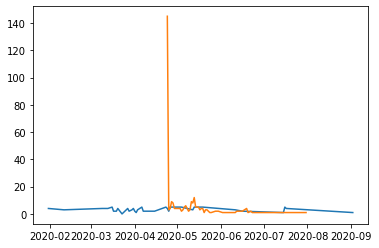

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pol.Date, pol.Count, color='tab:blue')
ax.plot(ltc_summary.Report_Data_Extracted, ltc_summary.name, color='tab:orange')

* Remove first entry for ltc summary as it doesnt seem to reflect temporal aspect of outbreaks accurately.
* Start policy data from the same date (april 25, 2020)
* <mark> need to manually filter policies </mark>

In [70]:
ltc_snip = ltc_summary.drop(index = 0)

In [71]:
pol_snip = pol[pol.Date > "2020-04-25"]

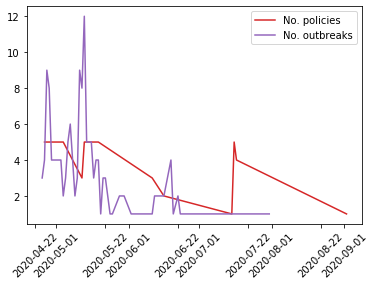

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pol_snip.Date, pol_snip.Count, color='tab:red', label = 'No. policies')
ax.plot(ltc_snip.Report_Data_Extracted, ltc_snip.name, color='tab:purple', label = 'No. outbreaks')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = "upper right")

Just plotting when policies were announced

In [82]:
pol_snip_obs = pd.DataFrame(pol_snip.groupby('Date')['Count'].nunique()).reset_index()

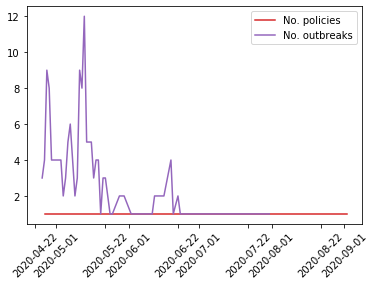

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pol_snip_obs.Date, pol_snip_obs.Count, color='tab:red', label = 'No. policies')
ax.plot(ltc_snip.Report_Data_Extracted, ltc_snip.name, color='tab:purple', label = 'No. outbreaks')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = "upper right")

In [84]:
import matplotlib.dates as mdates
from datetime import datetime

In [87]:
pol_snip

,Date,1,2,3,4,5,6,Count
0,2020-09-02,COVID-19 Visiting Policy,FAQs: COVID-19 Visiting Policy,Guide for visits,Limited visits during a COVID-19 outbreak,Visits with residents: a checklist for homes,NaN,1
1,2020-07-17,"Amendments to Emergency Order O. Reg. 95/20, u...",Ontario Driving Development of New Long-Term C...,NaN,NaN,NaN,NaN,4
2,2020-07-16,COVID-19 Testing for Long-Term Care Home Staff,NaN,NaN,NaN,NaN,NaN,5
3,2020-07-15,Update to Visits at Long-Term Care Homes,FAQs: Update to Visits at Long-Term Care Homes,Compassionate care visits,Indoor visits with residents: a checklist for ...,Guide for indoor visits,NaN,1
4,2020-06-16,FAQs: Directive #3 Update: Long-Term Care Visi...,Compassionate care visits,Outdoor visits with residents: a checklist for...,Guide for outdoor visits,NaN,NaN,2
5,2020-06-11,News Release: Ontario to Resume Family Visits ...,Resuming Visits in Long-Term Care Homes,COVID-19 Patient Screening Guidance Document,NaN,NaN,NaN,3
6,2020-05-19,Ontario Announces Independent Commission into ...,NaN,NaN,NaN,NaN,NaN,5
7,2020-05-14,COVID-19 Provincial Testing Guidance - Updated,NaN,NaN,NaN,NaN,NaN,5
8,2020-05-13,News Release: Ontario Takes Steps to Better Pr...,NaN,NaN,NaN,NaN,NaN,5
9,2020-05-12,NaN,Minister's Letter: Families and Caregivers of ...,NaN,NaN,NaN,NaN,3


In [89]:
# # Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(pol_snip.Date)/6)))[:len(pol_snip.Date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="COVID Policies and LTC Outbreaks")

ax.vlines(pol_snip.Date, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(pol_snip.Date, np.zeros_like(pol_snip.Date), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(pol_snip.Date, levels, pol_snip['1']):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

ValueError: view limit minimum -71921.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units